In [1]:
import os
from pathlib import Path
os.chdir("/Users/mregan/Dev/litmus/")
print(Path.cwd())

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2

/Users/mregan/Dev/litmus


In [2]:
import pandas as pd
import numpy as np

from user_data.litmus import get_labeled_data
from user_data.litmus import meta_model

pd.options.display.max_columns = 400
pd.options.display.max_rows = 400

In [3]:
ld = get_labeled_data.GetLabeledData(
    timeframe='5m',
    bt_filename='backtest_kamaprimary-2022-06-27_10-26-47.json',
    bt_pkl_filename='backtest_kamaprimary-2022-06-27_10-26-47_signals.pkl')

In [4]:
df = ld.get_all_data()
df

open      high       low  \
strategy    pair      date                                                      
KamaPrimary AAVE/USDT 2021-02-01 15:45:00+00:00  291.1460  291.6500  290.3280   
                      2021-02-01 16:55:00+00:00  288.8990  291.2800  288.5490   
                      2021-02-01 17:05:00+00:00  292.1920  295.7080  292.1920   
                      2021-02-01 17:20:00+00:00  294.7530  296.8320  294.4950   
                      2021-02-01 18:30:00+00:00  294.5360  294.8870  293.3000   
...                                                   ...       ...       ...   
            ZRX/USDT  2021-02-28 22:00:00+00:00    1.2237    1.2267    1.2181   
                      2021-02-28 22:30:00+00:00    1.2172    1.2172    1.1874   
                      2021-02-28 22:40:00+00:00    1.2015    1.2047    1.2000   
                      2021-02-28 23:00:00+00:00    1.2113    1.2335    1.2099   
                      2021-02-28 23:45:00+00:00    1.2184    1.2187    1.2026   

                                                    close     volume  \
strategy    pair      date                                             
KamaPrimary AAVE/USDT 2021-02-01 15:45:00+00:00  291.3990    277.307   
                      2021-02-01 16:55:00+00:00  291.2800   1698.207   
                      2021-02-01 17:05:00+00:00  294.9490   4032.906   
                      2021-02-01 17:20:00+00:00  296.8130   1204.940   
                      2021-02-01 18:30:00+00:00  293.3950    767.293   
...                                                   ...        ...   
            ZRX/USDT  2021-02-28 22:00:00+00:00    1.2205  32937.590   
                      2021-02-28 22:30:00+00:00    1.1890  75083.900   
                      2021-02-28 22:40:00+00:00    1.2042  30369.340   
                      2021-02-28 23:00:00+00:00    1.2316  71717.640   
                      2021-02-28 23:45:00+00:00    1.2073  50466.600   

                                                   volume_adi    volume_obv  \
strategy    pair      date                                                    
KamaPrimary AAVE/USDT 2021-02-01 15:45:00+00:00  9.567357e+02 -2.543020e+04   
                      2021-02-01 16:55:00+00:00  2.893061e+02 -2.969044e+04   
                      2021-02-01 17:05:00+00:00  1.523411e+03 -2.298014e+04   
                      2021-02-01 17:20:00+00:00  2.561243e+03 -2.414612e+04   
                      2021-02-01 18:30:00+00:00 -1.160481e+03 -2.920517e+04   
...                                                       ...           ...   
            ZRX/USDT  2021-02-28 22:00:00+00:00  2.484357e+07  3.680304e+07   
                      2021-02-28 22:30:00+00:00  2.477730e+07  3.671638e+07   
                      2021-02-28 22:40:00+00:00  2.481310e+07  3.676046e+07   
                      2021-02-28 23:00:00+00:00  2.487834e+07  3.682205e+07   
                      2021-02-28 23:45:00+00:00  2.482165e+07  3.670780e+07   

                                                 volume_cmf    volume_fi  \
strategy    pair      date                                                 
KamaPrimary AAVE/USDT 2021-02-01 15:45:00+00:00    0.250980   196.678853   
                      2021-02-01 16:55:00+00:00   -0.002897   189.736286   
                      2021-02-01 17:05:00+00:00    0.034397  2098.782993   
                      2021-02-01 17:20:00+00:00    0.043634  1555.385481   
                      2021-02-01 18:30:00+00:00    0.010688  -252.390668   
...                                                     ...          ...   
            ZRX/USDT  2021-02-28 22:00:00+00:00    0.240989    17.894725   
                      2021-02-28 22:30:00+00:00    0.122081  -292.623181   
                      2021-02-28 22:40:00+00:00    0.157737  -182.832595   
                      2021-02-28 23:00:00+00:00    0.216571   123.522320   
                      2021-02-28 23:45:00+00:00   -0.052189   -87.834856   

                                             

In [5]:
df['exit_reason'].value_counts()

upper_barrier_pt_sell          23168
lower_barrier_sl_sell          21378
vertical_barrier_force_sell     2367
force_exit                        75
Name: exit_reason, dtype: int64

In [6]:
# Tripple barrier target setting method

tbm_target = 'sign_based'

if tbm_target == 'upper_based':
    df['y_true'] = np.nan
    df['y_true'] = np.where(df['exit_reason'].isin(['upper_barrier_pt_sell']), True, df['y_true'])
    df['y_true'] = np.where(df['exit_reason'].isin(['lower_barrier_sl_sell', 'vertical_barrier_force_sell']), False, df['y_true'])
    df['y_true'] = np.where(df['exit_reason'].isin(['force_exit']), np.nan, df['y_true'])

elif tbm_target == 'sign_based':
    df['y_true'] = np.nan
    df['y_true'] = np.where(df['profit_ratio'] > 0, True, df['y_true'])
    df['y_true'] = np.where(df['profit_ratio'] <= 0, False, df['y_true'])
    df['y_true'] = np.where(df['exit_reason'].isin(['force_exit']), np.nan, df['y_true'])
    
df['y_true'].value_counts()

1.0    24320
0.0    22593
Name: y_true, dtype: int64

In [7]:
df['y_pred'] = True

In [8]:
# Train ML model to predict 'correct_trade'

model_features = ['kama', 'kama_delta', 'kama_threshold']

pair_only_features = [
       'volume_cmf', 'volume_fi', 'volume_em',
       'volume_vpt',  'volume_mfi',
       'volatility_bbw', 'volatility_bbp',  'volatility_kcw', 'volatility_kcp',
       'volatility_dcw',
       'volatility_dcp', 'volatility_ui', 'trend_macd_diff', 
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_mass_index',
       'trend_dpo', 'trend_kst_diff',
       'trend_stc', 'trend_adx', 'trend_adx_pos',
       'trend_adx_neg', 'trend_cci', 'trend_aroon_up', 'trend_aroon_down',
       'trend_aroon_ind',
       'momentum_rsi', 'momentum_stoch_rsi', 'momentum_stoch_rsi_k',
       'momentum_stoch_rsi_d', 'momentum_tsi', 'momentum_uo',
       'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
       'momentum_roc', 'momentum_ppo',
       'momentum_ppo_signal', 'momentum_ppo_hist', 'momentum_pvo',
       'momentum_pvo_signal', 'momentum_pvo_hist',
       'others_dr', 'others_dlr']

btc_5m = ['volume_cmf_btc_5m', 'volume_fi_btc_5m', 'volume_em_btc_5m', 'volume_vpt_btc_5m',
        'volume_mfi_btc_5m',
       'volatility_bbw_btc_5m',
       'volatility_bbp_btc_5m',
       'volatility_kcw_btc_5m', 'volatility_kcp_btc_5m', 'volatility_dcw_btc_5m',
       'volatility_dcp_btc_5m',
       'volatility_ui_btc_5m', 'trend_macd_btc_5m',
       'trend_macd_diff_btc_5m',
       'trend_vortex_ind_pos_btc_5m', 'trend_vortex_ind_neg_btc_5m',
       'trend_vortex_ind_diff_btc_5m', 'trend_trix_btc_5m',
       'trend_mass_index_btc_5m', 'trend_dpo_btc_5m',
       'trend_kst_btc_5m', 'trend_kst_sig_btc_5m',
       'trend_kst_diff_btc_5m', 'trend_stc_btc_5m',
       'trend_adx_btc_5m', 'trend_adx_pos_btc_5m',
       'trend_adx_neg_btc_5m', 'trend_cci_btc_5m',
       'trend_aroon_up_btc_5m',
       'trend_aroon_down_btc_5m', 'trend_aroon_ind_btc_5m',
       'momentum_rsi_btc_5m',
       'momentum_stoch_rsi_btc_5m', 'momentum_stoch_rsi_k_btc_5m',
       'momentum_stoch_rsi_d_btc_5m', 'momentum_tsi_btc_5m',
       'momentum_uo_btc_5m', 'momentum_stoch_btc_5m',
       'momentum_stoch_signal_btc_5m', 'momentum_wr_btc_5m',
       'momentum_ao_btc_5m', 'momentum_roc_btc_5m',
       'momentum_ppo_btc_5m',
       'momentum_ppo_hist_btc_5m', 'momentum_pvo_btc_5m',
       'momentum_pvo_signal_btc_5m', 'momentum_pvo_hist_btc_5m',
       'others_dr_btc_5m', 'others_dlr_btc_5m']

btc_1h = ['volume_cmf_btc_1h', 'volume_fi_btc_1h', 'volume_em_btc_1h', 'volume_vpt_btc_1h',
        'volume_mfi_btc_1h',
       'volatility_bbw_btc_1h',
       'volatility_bbp_btc_1h',
       'volatility_kcw_btc_1h', 'volatility_kcp_btc_1h', 'volatility_dcw_btc_1h',
       'volatility_dcp_btc_1h',
       'volatility_ui_btc_1h', 'trend_macd_btc_1h',
       'trend_macd_diff_btc_1h',
       'trend_vortex_ind_pos_btc_1h', 'trend_vortex_ind_neg_btc_1h',
       'trend_vortex_ind_diff_btc_1h', 'trend_trix_btc_1h',
       'trend_mass_index_btc_1h', 'trend_dpo_btc_1h',
       'trend_kst_btc_1h', 'trend_kst_sig_btc_1h',
       'trend_kst_diff_btc_1h', 'trend_stc_btc_1h',
       'trend_adx_btc_1h', 'trend_adx_pos_btc_1h',
       'trend_adx_neg_btc_1h', 'trend_cci_btc_1h',
       'trend_aroon_up_btc_1h',
       'trend_aroon_down_btc_1h', 'trend_aroon_ind_btc_1h',
       'momentum_rsi_btc_1h',
       'momentum_stoch_rsi_btc_1h', 'momentum_stoch_rsi_k_btc_1h',
       'momentum_stoch_rsi_d_btc_1h', 'momentum_tsi_btc_1h',
       'momentum_uo_btc_1h', 'momentum_stoch_btc_1h',
       'momentum_stoch_signal_btc_1h', 'momentum_wr_btc_1h',
       'momentum_ao_btc_1h', 'momentum_roc_btc_1h',
       'momentum_ppo_btc_1h',
       'momentum_ppo_hist_btc_1h', 'momentum_pvo_btc_1h',
       'momentum_pvo_signal_btc_1h', 'momentum_pvo_hist_btc_1h',
       'others_dr_btc_1h', 'others_dlr_btc_1h']

best = ['momentum_uo_btc_5m', 'trend_stc_btc_1h',
       'momentum_roc_btc_5m',
       'volatility_bbw_btc_5m',
       'momentum_stoch_rsi_btc_1h', 'trend_stc',
       'momentum_stoch_rsi_k_btc_1h',
       'momentum_ppo',
       'momentum_ao_btc_1h',
       'volatility_dcp_btc_5m', 'momentum_pvo',
       'momentum_stoch', 'volume_cmf',
       'volatility_bbw_btc_1h',
       'volatility_kcp_btc_1h', 'volume_fi_btc_1h',
       'volume_em_btc_5m', 'momentum_stoch_btc_1h',
       'momentum_uo_btc_1h',
       'volatility_dcw_btc_5m',
       'momentum_rsi_btc_1h',
       'volume_mfi_btc_1h', 'trend_adx_btc_5m',
       'momentum_stoch_rsi_k', 'trend_cci_btc_1h',
       'trend_kst_btc_5m', 'volatility_dcp',
       'trend_aroon_ind_btc_1h',
       'trend_vortex_ind_neg_btc_5m',
       'volatility_dcw', 'others_dr_btc_5m',
       'trend_aroon_up_btc_5m',
       'momentum_stoch_signal',
       'momentum_wr_btc_5m',
       'momentum_pvo_signal_btc_5m',
       'trend_kst_diff_btc_5m', 'momentum_rsi']

best2 = ['transactions_transfers_volume_within_exchanges_sum_ppo_1d',
       'trend_vortex_ind_pos_btc_5m',
       'indicators_sol_3y_5y_ppo_1d',
       'volatility_kcp',
       'market_marketcap_usd_x_ppo_1d',
       'momentum_tsi',
       'momentum_stoch_rsi_k_btc_5m',
       'transactions_transfers_volume_from_exchanges_sum_ppo_1d',
       'indicators_realized_profit_ppo_1d',
       'momentum_stoch_signal_btc_1h',
       'volatility_kcw_btc_1h', 'volume_fi_btc_1h',
       'momentum_ppo_hist_btc_1h',
       'supply_issued_ppo_1d', 'volume_em_btc_1h',
       'momentum_roc_btc_5m',
       'indicators_sopr_ppo_1d', 'momentum_stoch',
       'volume_vpt_btc_1h',
       'transactions_transfers_volume_adjusted_median_ppo_1d',
       'supply_current_adjusted_ppo_1d',
       'transactions_transfers_volume_adjusted_mean_ppo_1d',
       'blockchain_utxo_spent_value_median_ppo_1d',
       'indicators_svl_7y_10y_ppo_1d',
       'volatility_bbp_btc_1h', 'volatility_dcw',
       'trend_stc', 'trend_vortex_ind_pos',
       'momentum_roc',
       'indicators_cdd_supply_adjusted_binary_ppo_1d',
       'indicators_asol_ppo_1d',
       'volatility_bbw_btc_5m', 'volume_mfi_btc_1h',
       'transactions_transfers_between_exchanges_count_ppo_1d',
       'trend_vortex_ind_neg_btc_5m']

precision_best_all = ['trend_macd_diff_btc_5m',
 'volatility_kcp_btc_1h',
 'volatility_bbp_btc_1h',
 'trend_trix_btc_5m',
 'momentum_ppo_btc_5m',
 'trend_adx_pos_btc_1h',
 'indicators_stock_to_flow_deflection_ppo_1d',
 'supply_active_7y_10y_ppo_1d',
 'volatility_kcp',
 'indicators_liveliness_ppo_1d',
 'trend_macd_btc_1h',
 'trend_vortex_ind_pos_btc_1h',
 'market_price_usd_close_ppo_1d',
 'volatility_dcw',
 'volatility_dcw_btc_1h',
 'market_marketcap_usd_x_ppo_1d',
 'momentum_stoch_signal_btc_1h',
 'trend_kst_btc_1h',
 'volume_mfi',
 'indicators_svl_3m_6m_ppo_1d',
 'volatility_dcw_btc_5m',
 'blockchain_block_interval_mean_ppo_1d',
 'indicators_realized_profits_to_value_ratio_ppo_1d',
 'volatility_ui',
 'momentum_ppo_hist_btc_5m',
 'indicators_sol_5y_7y_ppo_1d',
 'blockchain_utxo_created_value_mean_ppo_1d',
 'indicators_svl_1d_1w_ppo_1d',
 'trend_kst_diff_btc_1h',
 'momentum_pvo_hist',
 'volatility_dcp_btc_5m',
 'trend_adx_pos_btc_5m'
]

exclude = []
exclude = ['gn_10m__v1_metrics_transactions_transfers_volume_between_exchanges_sum_ppo_16_10m', 'gn_10m__v1_metrics_transactions_transfers_between_exchanges_count_ppo_20_10m']

gn_cols = [c for c in df.columns if 'gn_' in c and c not in exclude]

all_features = pair_only_features + btc_5m + btc_1h + model_features + gn_cols

gn_test = best + gn_cols

In [9]:
# Drop BTC

try:
    df = df.drop('BTC/USDT', level='pair', axis=0)
except:
    pass

In [10]:
# Limit training data so we can backest with holdout
idx = pd.IndexSlice

model = meta_model.MetaModel(data=df.loc[idx[:, :, :]], 
                     X_features_num=gn_test,
                     X_features_cat=['pair_copy'],
                     y_pred_col='y_pred', 
                     y_true_col='y_true',
                     sample_weight_col='profit_ratio')

In [11]:
model.check_data()

DataFrame contains NaNs which should be addressed before proceeding 

List of features with NaNs are: 

gn_10m__v1_metrics_transactions_transfers_volume_within_exchanges_sum_ppo_27_10m    1103
gn_10m__v1_metrics_transactions_transfers_volume_to_exchanges_mean_ppo_24_10m       1075
gn_10m__v1_metrics_transactions_transfers_count_ppo_30_10m                          1075
gn_10m__v1_metrics_distribution_balance_exchanges_ppo_17_10m                        1075
gn_10m__v1_metrics_transactions_transfers_to_exchanges_count_ppo_18_10m             1075
gn_10m__v1_metrics_transactions_transfers_from_exchanges_count_ppo_19_10m           1075
gn_10m__v1_metrics_transactions_transfers_volume_exchanges_net_ppo_21_10m           1075
gn_10m__v1_metrics_transactions_transfers_volume_from_exchanges_mean_ppo_22_10m     1075
gn_10m__v1_metrics_transactions_transfers_volume_from_exchanges_sum_ppo_23_10m      1075
gn_10m__v1_metrics_transactions_transfers_rate_ppo_31_10m                           1075
gn_10m

In [12]:
model.clean_data()

Removed 17 NaN / Infinity observations from DataFrame


In [13]:
model.classification_report(model='primary')

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     22056
         1.0       0.52      1.00      0.68     23734

    accuracy                           0.52     45790
   macro avg       0.26      0.50      0.34     45790
weighted avg       0.27      0.52      0.35     45790



In [14]:
model.run_cross_validation(cv_n_splits=5, cv_gap=40)

Train: 2021-02-01 2021-02-05 Test: 2021-02-05 2021-02-10
Train: 2021-02-04 2021-02-10 Test: 2021-02-10 2021-02-14
Train: 2021-02-09 2021-02-14 Test: 2021-02-14 2021-02-20
Train: 2021-02-13 2021-02-20 Test: 2021-02-20 2021-02-23
Train: 2021-02-19 2021-02-23 Test: 2021-02-23 2021-02-28


In [15]:
model.classification_report(model='meta')

              precision    recall  f1-score   support

         0.0       0.52      0.41      0.46     19098
         1.0       0.51      0.61      0.56     19057

    accuracy                           0.51     38155
   macro avg       0.51      0.51      0.51     38155
weighted avg       0.51      0.51      0.51     38155



In [ ]:
model.get_most_important_features(cv_n_splits=5, cv_gap=40, cv_sample=100)

In [ ]:
model.plot_feature_selection(figsize=(50, 8))

In [ ]:
best_features_df = pd.DataFrame.from_dict(model.clf.named_steps['sfs'].get_metric_dict()).T

In [ ]:
top_features = []
prev_features = []

for k, v in model.clf.named_steps['sfs'].subsets_.items():
    current_features = list(v['feature_idx'])
    current_features = [i for i in current_features if i not in prev_features]
    top_features += current_features
    prev_features = list(v['feature_idx'])
    
ranked_top_features = model.X_transformed_features[[top_features]]
ranked_top_features

In [ ]:
ranked_top_features[:40]

In [ ]:
[f for f in ranked_top_features if 'onehotencoder__' not in f]

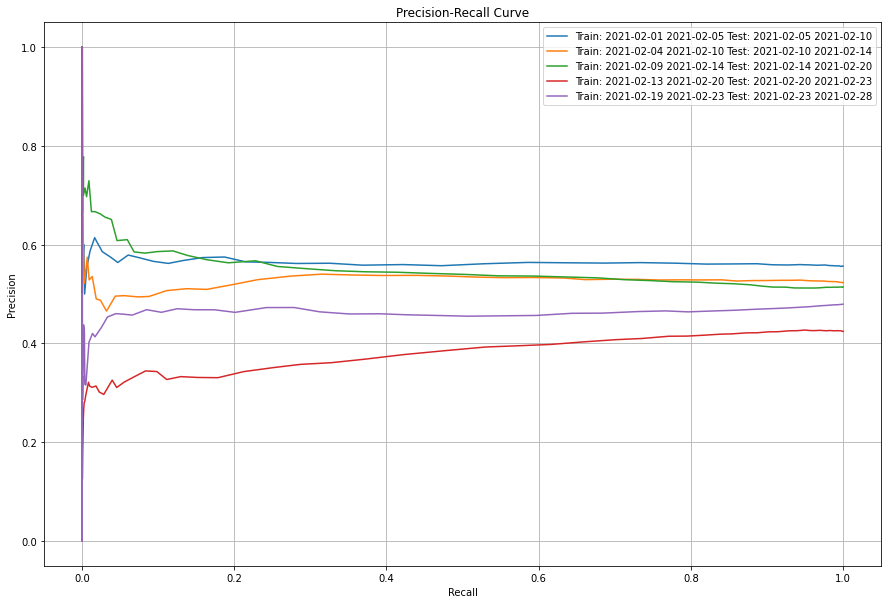

In [16]:
model.plot_precision_recall_curve()

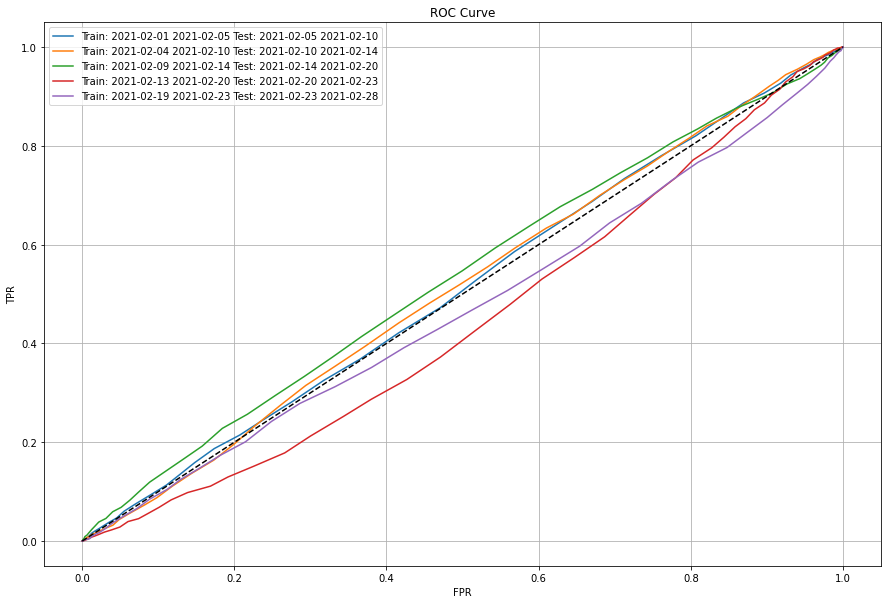

In [17]:
model.plot_roc_curve()

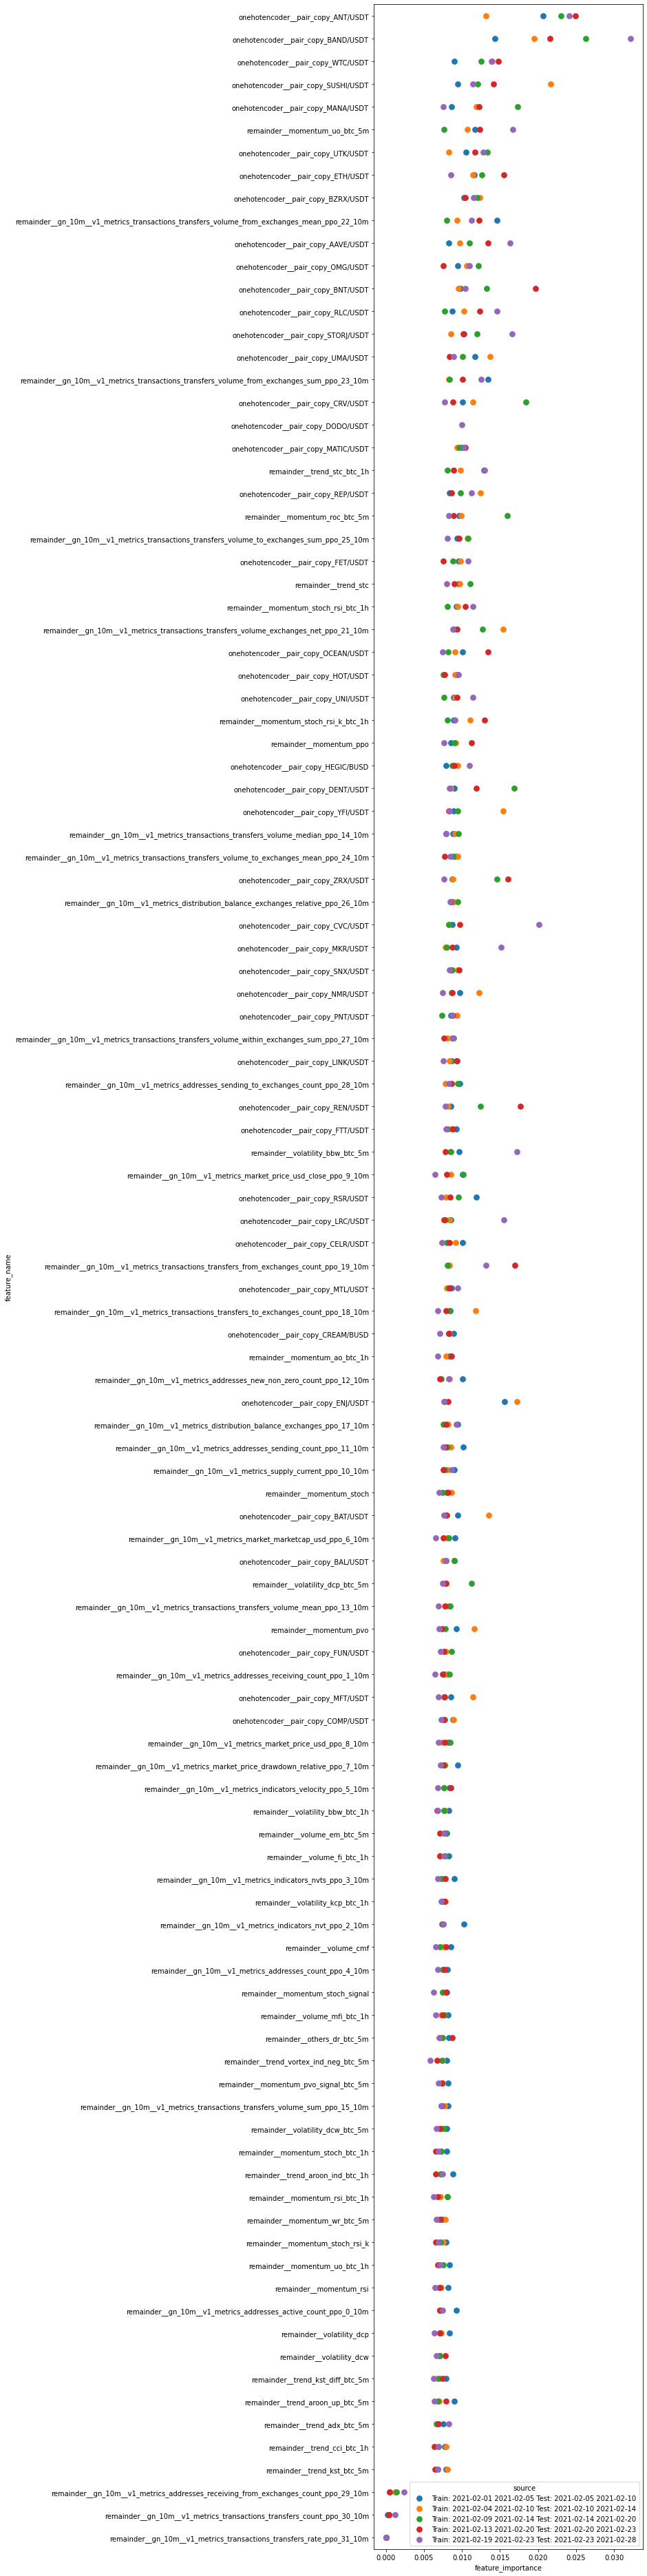

In [18]:
model.plot_feature_importance()

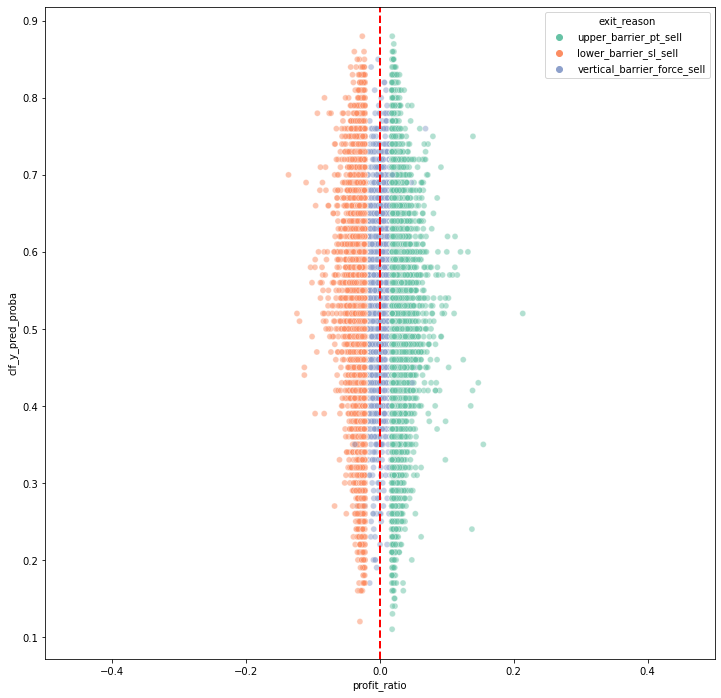

In [19]:
model.plot_probability_returns_scatter()

In [20]:
model.probability_returns_table()

,mean,median,count
clf_y_pred_proba_bin,,,
1.0,0.001754,0.018434,56
2.0,-0.000051,0.018172,1150
3.0,-0.002492,-0.021992,4531
4.0,-0.002456,-0.021976,8478
5.0,-0.001762,0.001058,12120
6.0,-0.001454,0.010293,8875
7.0,-0.001677,0.015839,2716
8.0,-0.000689,0.018261,229


In [ ]:
model.run_train_on_more_data(date_from='2021-01-01')

In [ ]:
model.plot_feature_importance()

In [ ]:
model.model_threshold_table()

In [ ]:
model.set_model_threshold(model_threshold=0.5)

In [ ]:
model.save_model(filename='VulcanMeta.pkl')

# Appendix / Testing (to be deleted)

In [ ]:
idx = pd.IndexSlice

model.data['clf_y_pred_proba'].sort_index(level='date').plot(figsize=(15, 7))
model.data.loc[idx[:, 'ETH/USDT', :]]['profit_ratio'].sort_index(level='date').plot(secondary_y=True)


In [ ]:
feature_names_out = model.clf['full_transformer']['column_transformer'].get_feature_names_out()
feature_names_out

In [ ]:
transformed_data = model.clf['full_transformer'].transform(model.X_test)
transformed_data

In [ ]:
features_out_df = pd.DataFrame(transformed_data, columns=feature_names_out)
features_out_df

In [ ]:
features_out_df.plot(subplots=True, figsize=(10, 400))

In [ ]:
model.X_test.plot(subplots=True, figsize=(10, 400))

In [ ]:
fracdiff_coeff = model.clf['full_transformer']['column_transformer'].transformers_[1][1].d_
fracdiff_coeff

In [ ]:
import fracdiff

In [ ]:
ff = fracdiff.sklearn.FracdiffStat()

In [ ]:
ff.fit(model.X_test['momentum_ppo_hist_btc_12h'].values.reshape(-1, 1))

In [ ]:
model.X_test['momentum_ppo_hist_btc_12h'].plot()

In [ ]:
ff.d_

In [ ]:
model.clf.named_steps['column_transformer'].get_feature_names_out()

In [ ]:
model.roc_stats

In [ ]:
df.to_csv('litmus_labeled_data_peter.csv')

In [ ]:
l = ['onehotencoder__pair_copy_1INCH/USDT',
 'onehotencoder__pair_copy_AAVE/USDT', 'onehotencoder__pair_copy_ACM/USDT',
 'onehotencoder__pair_copy_ADA/USDT', 'onehotencoder__pair_copy_ADX/USDT',
 'onehotencoder__pair_copy_AGLD/USDT', 'onehotencoder__pair_copy_AION/USDT',
 'onehotencoder__pair_copy_AKRO/USDT', 'onehotencoder__pair_copy_ALCX/USDT',
 'onehotencoder__pair_copy_ALGO/USDT',
 'onehotencoder__pair_copy_ALICE/USDT',
 'onehotencoder__pair_copy_ALPACA/USDT',
 'onehotencoder__pair_copy_ALPHA/USDT', 'onehotencoder__pair_copy_AMP/USDT',
 'onehotencoder__pair_copy_ANKR/USDT', 'onehotencoder__pair_copy_ANT/USDT',
 'onehotencoder__pair_copy_AR/USDT', 'onehotencoder__pair_copy_ARDR/USDT',
 'onehotencoder__pair_copy_ARPA/USDT', 'onehotencoder__pair_copy_ASR/USDT',
 'onehotencoder__pair_copy_ATA/USDT', 'onehotencoder__pair_copy_ATM/USDT',
 'onehotencoder__pair_copy_ATOM/USDT',
 'onehotencoder__pair_copy_AUDIO/USDT',
 'onehotencoder__pair_copy_AUTO/USDT', 'onehotencoder__pair_copy_AVA/USDT',
 'onehotencoder__pair_copy_AVAX/USDT', 'onehotencoder__pair_copy_AXS/USDT',
 'onehotencoder__pair_copy_BADGER/USDT',
 'onehotencoder__pair_copy_BAKE/USDT', 'onehotencoder__pair_copy_BAL/USDT',
 'onehotencoder__pair_copy_BAND/USDT', 'onehotencoder__pair_copy_BAR/USDT',
 'onehotencoder__pair_copy_BAT/USDT', 'onehotencoder__pair_copy_BCH/USDT',
 'onehotencoder__pair_copy_BEAM/USDT', 'onehotencoder__pair_copy_BEL/USDT',
 'onehotencoder__pair_copy_BETA/USDT', 'onehotencoder__pair_copy_BICO/USDT',
 'onehotencoder__pair_copy_BLZ/USDT', 'onehotencoder__pair_copy_BNB/USDT',
 'onehotencoder__pair_copy_BNT/USDT', 'onehotencoder__pair_copy_BOND/USDT',
 'onehotencoder__pair_copy_CAKE/USDT', 'onehotencoder__pair_copy_CELO/USDT',
 'onehotencoder__pair_copy_CELR/USDT', 'onehotencoder__pair_copy_CFX/USDT',
 'onehotencoder__pair_copy_CHESS/USDT', 'onehotencoder__pair_copy_CHZ/USDT',
 'onehotencoder__pair_copy_CITY/USDT', 'onehotencoder__pair_copy_CKB/USDT',
 'onehotencoder__pair_copy_CLV/USDT', 'onehotencoder__pair_copy_COMP/USDT',
 'onehotencoder__pair_copy_COS/USDT', 'onehotencoder__pair_copy_COTI/USDT',
 'onehotencoder__pair_copy_CRV/USDT', 'onehotencoder__pair_copy_CTK/USDT',
 'onehotencoder__pair_copy_CTXC/USDT', 'onehotencoder__pair_copy_CVC/USDT',
 'onehotencoder__pair_copy_CVP/USDT', 'onehotencoder__pair_copy_CVX/USDT',
 'onehotencoder__pair_copy_DASH/USDT', 'onehotencoder__pair_copy_DCR/USDT',
 'onehotencoder__pair_copy_DENT/USDT', 'onehotencoder__pair_copy_DF/USDT',
 'onehotencoder__pair_copy_DGB/USDT', 'onehotencoder__pair_copy_DIA/USDT',
 'onehotencoder__pair_copy_DNT/USDT', 'onehotencoder__pair_copy_DOCK/USDT',
 'onehotencoder__pair_copy_DODO/USDT', 'onehotencoder__pair_copy_DOGE/USDT',
 'onehotencoder__pair_copy_DOT/USDT', 'onehotencoder__pair_copy_DUSK/USDT',
 'onehotencoder__pair_copy_DYDX/USDT', 'onehotencoder__pair_copy_EGLD/USDT',
 'onehotencoder__pair_copy_ELF/USDT', 'onehotencoder__pair_copy_ENJ/USDT',
 'onehotencoder__pair_copy_ENS/USDT', 'onehotencoder__pair_copy_EOS/USDT',
 'onehotencoder__pair_copy_EPS/USDT', 'onehotencoder__pair_copy_ERN/USDT',
 'onehotencoder__pair_copy_ETC/USDT', 'onehotencoder__pair_copy_ETH/USDT',
 'onehotencoder__pair_copy_FARM/USDT', 'onehotencoder__pair_copy_FET/USDT',
 'onehotencoder__pair_copy_FIDA/USDT', 'onehotencoder__pair_copy_FIL/USDT',
 'onehotencoder__pair_copy_FIO/USDT', 'onehotencoder__pair_copy_FIRO/USDT',
 'onehotencoder__pair_copy_FIS/USDT', 'onehotencoder__pair_copy_FLM/USDT',
 'onehotencoder__pair_copy_FLOW/USDT', 'onehotencoder__pair_copy_FLUX/USDT',
 'onehotencoder__pair_copy_FOR/USDT', 'onehotencoder__pair_copy_FORTH/USDT',
 'onehotencoder__pair_copy_FRONT/USDT', 'onehotencoder__pair_copy_FTM/USDT',
 'onehotencoder__pair_copy_FTT/USDT', 'onehotencoder__pair_copy_FUN/USDT',
 'onehotencoder__pair_copy_FXS/USDT', 'onehotencoder__pair_copy_GALA/USDT',
 'onehotencoder__pair_copy_GHST/USDT', 'onehotencoder__pair_copy_GRT/USDT',
 'onehotencoder__pair_copy_HARD/USDT', 'onehotencoder__pair_copy_HBAR/USDT',
 'onehotencoder__pair_copy_HIVE/USDT', 'onehotencoder__pair_copy_HNT/USDT',
 'onehotencoder__pair_copy_ICP/USDT', 'onehotencoder__pair_copy_ICX/USDT',
 'onehotencoder__pair_copy_IDEX/USDT', 'onehotencoder__pair_copy_ILV/USDT',
 'onehotencoder__pair_copy_INJ/USDT', 'onehotencoder__pair_copy_IOST/USDT',
 'onehotencoder__pair_copy_IOTA/USDT', 'onehotencoder__pair_copy_IOTX/USDT',
 'onehotencoder__pair_copy_IRIS/USDT',
 'onehotencoder__pair_copy_JASMY/USDT', 'onehotencoder__pair_copy_JST/USDT',
 'onehotencoder__pair_copy_JUV/USDT', 'onehotencoder__pair_copy_KAVA/USDT',
 'onehotencoder__pair_copy_KLAY/USDT', 'onehotencoder__pair_copy_KMD/USDT',
 'onehotencoder__pair_copy_KNC/USDT', 'onehotencoder__pair_copy_KP3R/USDT',
 'onehotencoder__pair_copy_KSM/USDT', 'onehotencoder__pair_copy_LINA/USDT',
 'onehotencoder__pair_copy_LINK/USDT', 'onehotencoder__pair_copy_LIT/USDT',
 'onehotencoder__pair_copy_LPT/USDT', 'onehotencoder__pair_copy_LRC/USDT',
 'onehotencoder__pair_copy_LSK/USDT', 'onehotencoder__pair_copy_LTC/USDT',
 'onehotencoder__pair_copy_LTO/USDT', 'onehotencoder__pair_copy_LUNA/USDT',
 'onehotencoder__pair_copy_MANA/USDT', 'onehotencoder__pair_copy_MASK/USDT',
 'onehotencoder__pair_copy_MATIC/USDT', 'onehotencoder__pair_copy_MC/USDT',
 'onehotencoder__pair_copy_MDT/USDT', 'onehotencoder__pair_copy_MDX/USDT',
 'onehotencoder__pair_copy_MFT/USDT', 'onehotencoder__pair_copy_MINA/USDT',
 'onehotencoder__pair_copy_MITH/USDT', 'onehotencoder__pair_copy_MKR/USDT',
 'onehotencoder__pair_copy_MLN/USDT', 'onehotencoder__pair_copy_MTL/USDT',
 'onehotencoder__pair_copy_NBS/USDT', 'onehotencoder__pair_copy_NEAR/USDT',
 'onehotencoder__pair_copy_NEO/USDT', 'onehotencoder__pair_copy_NKN/USDT',
 'onehotencoder__pair_copy_NMR/USDT', 'onehotencoder__pair_copy_NULS/USDT',
 'onehotencoder__pair_copy_OCEAN/USDT', 'onehotencoder__pair_copy_OG/USDT',
 'onehotencoder__pair_copy_OGN/USDT', 'onehotencoder__pair_copy_OM/USDT',
 'onehotencoder__pair_copy_OMG/USDT', 'onehotencoder__pair_copy_ONE/USDT',
 'onehotencoder__pair_copy_ONG/USDT', 'onehotencoder__pair_copy_ONT/USDT',
 'onehotencoder__pair_copy_OOKI/USDT', 'onehotencoder__pair_copy_ORN/USDT',
 'onehotencoder__pair_copy_OXT/USDT',
 'onehotencoder__pair_copy_PEOPLE/USDT',
 'onehotencoder__pair_copy_PERP/USDT', 'onehotencoder__pair_copy_PHA/USDT',
 'onehotencoder__pair_copy_PLA/USDT', 'onehotencoder__pair_copy_PNT/USDT',
 'onehotencoder__pair_copy_POLS/USDT', 'onehotencoder__pair_copy_POLY/USDT',
 'onehotencoder__pair_copy_POND/USDT', 'onehotencoder__pair_copy_POWR/USDT',
 'onehotencoder__pair_copy_PSG/USDT', 'onehotencoder__pair_copy_PYR/USDT',
 'onehotencoder__pair_copy_QI/USDT', 'onehotencoder__pair_copy_QNT/USDT',
 'onehotencoder__pair_copy_QTUM/USDT',
 'onehotencoder__pair_copy_QUICK/USDT', 'onehotencoder__pair_copy_RAD/USDT',
 'onehotencoder__pair_copy_RAMP/USDT', 'onehotencoder__pair_copy_RARE/USDT',
 'onehotencoder__pair_copy_RAY/USDT', 'onehotencoder__pair_copy_REEF/USDT',
 'onehotencoder__pair_copy_REN/USDT', 'onehotencoder__pair_copy_REP/USDT',
 'onehotencoder__pair_copy_RGT/USDT', 'onehotencoder__pair_copy_RIF/USDT',
 'onehotencoder__pair_copy_RLC/USDT', 'onehotencoder__pair_copy_RNDR/USDT',
 'onehotencoder__pair_copy_ROSE/USDT', 'onehotencoder__pair_copy_RSR/USDT',
 'onehotencoder__pair_copy_RUNE/USDT', 'onehotencoder__pair_copy_RVN/USDT',
 'onehotencoder__pair_copy_SAND/USDT',
 'onehotencoder__pair_copy_SANTOS/USDT',
 'onehotencoder__pair_copy_SFP/USDT', 'onehotencoder__pair_copy_SHIB/USDT',
 'onehotencoder__pair_copy_SKL/USDT', 'onehotencoder__pair_copy_SLP/USDT',
 'onehotencoder__pair_copy_SNX/USDT', 'onehotencoder__pair_copy_SOL/USDT',
 'onehotencoder__pair_copy_SPELL/USDT', 'onehotencoder__pair_copy_SRM/USDT',
 'onehotencoder__pair_copy_STMX/USDT',
 'onehotencoder__pair_copy_STORJ/USDT',
 'onehotencoder__pair_copy_STPT/USDT',
 'onehotencoder__pair_copy_STRAX/USDT', 'onehotencoder__pair_copy_STX/USDT',
 'onehotencoder__pair_copy_SUPER/USDT',
 'onehotencoder__pair_copy_SUSHI/USDT', 'onehotencoder__pair_copy_SXP/USDT',
 'onehotencoder__pair_copy_SYS/USDT', 'onehotencoder__pair_copy_TFUEL/USDT',
 'onehotencoder__pair_copy_THETA/USDT', 'onehotencoder__pair_copy_TKO/USDT',
 'onehotencoder__pair_copy_TLM/USDT', 'onehotencoder__pair_copy_TOMO/USDT',
 'onehotencoder__pair_copy_TORN/USDT', 'onehotencoder__pair_copy_TRB/USDT',
 'onehotencoder__pair_copy_TRIBE/USDT',
 'onehotencoder__pair_copy_TROY/USDT', 'onehotencoder__pair_copy_TRU/USDT',
 'onehotencoder__pair_copy_TRX/USDT', 'onehotencoder__pair_copy_TVK/USDT',
 'onehotencoder__pair_copy_TWT/USDT', 'onehotencoder__pair_copy_UMA/USDT',
 'onehotencoder__pair_copy_UNFI/USDT', 'onehotencoder__pair_copy_UNI/USDT',
 'onehotencoder__pair_copy_UTK/USDT', 'onehotencoder__pair_copy_VET/USDT',
 'onehotencoder__pair_copy_VITE/USDT', 'onehotencoder__pair_copy_VTHO/USDT',
 'onehotencoder__pair_copy_WAN/USDT', 'onehotencoder__pair_copy_WAVES/USDT',
 'onehotencoder__pair_copy_WAXP/USDT', 'onehotencoder__pair_copy_WIN/USDT',
 'onehotencoder__pair_copy_WING/USDT', 'onehotencoder__pair_copy_WRX/USDT',
 'onehotencoder__pair_copy_WTC/USDT', 'onehotencoder__pair_copy_XEC/USDT',
 'onehotencoder__pair_copy_XEM/USDT', 'onehotencoder__pair_copy_XLM/USDT',
 'onehotencoder__pair_copy_XMR/USDT', 'onehotencoder__pair_copy_XRP/USDT',
 'onehotencoder__pair_copy_XTZ/USDT', 'onehotencoder__pair_copy_XVG/USDT',
 'onehotencoder__pair_copy_XVS/USDT', 'onehotencoder__pair_copy_YFI/USDT',
 'onehotencoder__pair_copy_YFII/USDT', 'onehotencoder__pair_copy_YGG/USDT',
 'onehotencoder__pair_copy_ZEC/USDT', 'onehotencoder__pair_copy_ZEN/USDT',
 'onehotencoder__pair_copy_ZIL/USDT', 'onehotencoder__pair_copy_ZRX/USDT',
 'remainder__volume_cmf', 'remainder__volume_fi', 'remainder__volume_em',
 'remainder__volume_vpT']

In [ ]:
for i, j in enumerate(l):
    print(i, j)

In [ ]:
tuple(i for (i, j) in enumerate(l) if 'onehotencoder__' in j)

In [ ]:
gn_cols = [c for c in df.columns if 'gn_' in c]

In [ ]:
import matplotlib.pyplot as plt

for k, d in df.groupby('pair_copy'):
    for c in gn_cols + ['momentum_ppo']:
        title = str(k) + "" + str(c)
        d[c].plot(title=title, figsize=(20,7))
        d['close'].plot(secondary_y=True)
        plt.show()

In [ ]:
model.data.groupby(model.data.date_btc_5m.dt.week).size()

In [ ]:
model.data.to_csv('glassnode_pair_backtest_trades_data.csv')

In [ ]:
from user_data.litmus import indicator_helpers

In [ ]:
indicator_helpers.daily_volatility(df['close'])

In [ ]:
test = df.reset_index()

In [ ]:
test[['date', 'close']]

In [ ]:
test.set_index(keys='date', inplace=True)
test

In [ ]:
test[test['pair_copy'] == 'AAVE/USDT']

In [ ]:
x = indicator_helpers.daily_volatility(test[test['pair_copy'] == 'ETH/USDT'], 288, 50)

In [ ]:
x['daily_volatility']